In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Hitung loadings (komponen PCA)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

print("=== INFORMASI PCA ===")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.3f}")
print(f"Shape of loadings: {loadings.shape}")

=== INFORMASI PCA ===
Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.958
Shape of loadings: (4, 2)


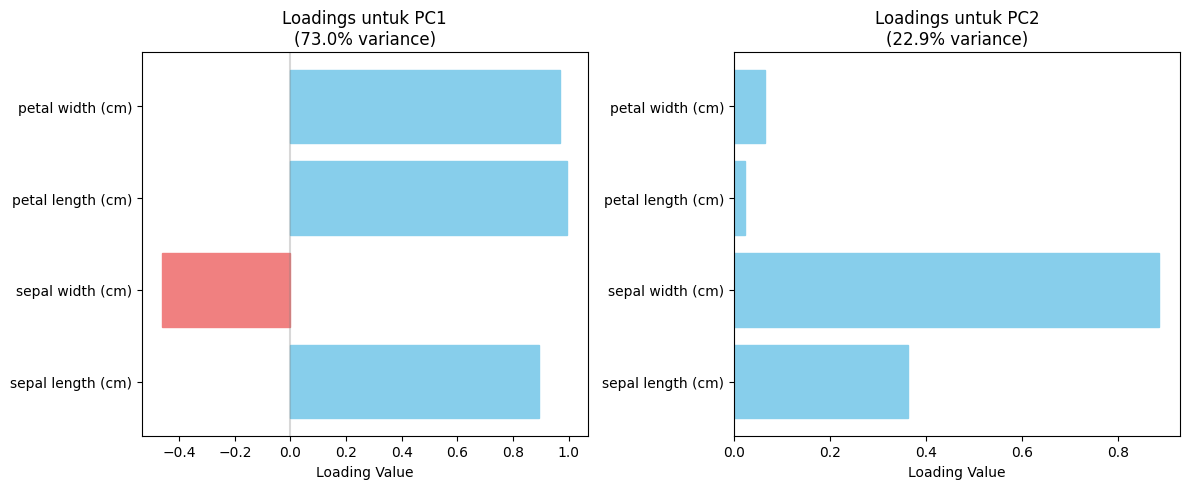

In [3]:
# BASIC LOADING PLOT
def plot_basic_loadings(loadings, feature_names, n_components=2):
    """
    Plot basic loading plot untuk n komponen pertama
    """
    fig, axes = plt.subplots(1, n_components, figsize=(12, 5))
    
    for i in range(n_components):
        # Plot loadings untuk PC i+1
        ax = axes[i] if n_components > 1 else axes
        bars = ax.barh(feature_names, loadings[:, i])
        ax.set_title(f'Loadings untuk PC{i+1}\n'
                    f'({pca.explained_variance_ratio_[i]:.1%} variance)')
        ax.set_xlabel('Loading Value')
        ax.axvline(x=0, color='grey', linestyle='-', alpha=0.3)
        
        # Warna berdasarkan sign loading
        for bar in bars:
            if bar.get_width() >= 0:
                bar.set_color('skyblue')
            else:
                bar.set_color('lightcoral')
    
    plt.tight_layout()
    plt.show()

# Plot untuk 2 komponen pertama
plot_basic_loadings(loadings, feature_names, n_components=2)

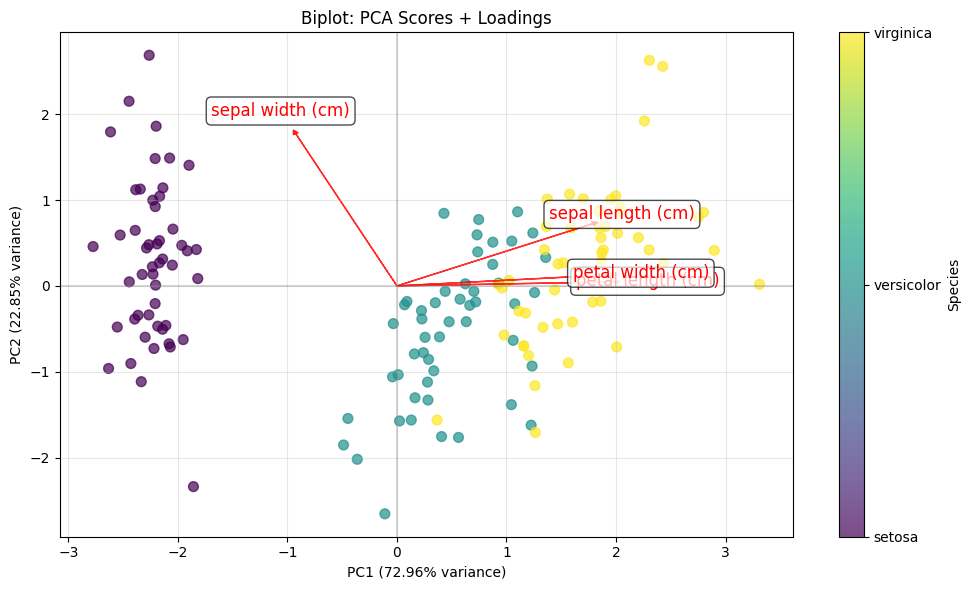

INTERPRETASI BIPLOT:
• Panah menunjukkan arah dan kekuatan pengaruh setiap feature
• Panah yang searah = features berkorelasi positif
• Panah berlawanan arah = features berkorelasi negatif
• Panjang panah = importance feature dalam PC
• Data points dekat panah = strongly influenced oleh feature tersebut


In [5]:
# BIPLOT - COMBINED SCORE AND LOADING PLOT
def create_biplot(X_pca, loadings, feature_names, y, target_names, scale_factor=2):
    """
    Buat biplot: kombinasi score plot dan loading plot
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot scores (data points) dengan warna berdasarkan species
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                        cmap='viridis', alpha=0.7, s=50)
    
    # Plot loadings (arrows)
    for i, feature in enumerate(feature_names):
        ax.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor,
                head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.8)
        ax.text(loadings[i, 0] * scale_factor * 1.15, 
                loadings[i, 1] * scale_factor * 1.15, 
                feature, color='red', ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
    # Settings plot
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    ax.set_title('Biplot: PCA Scores + Loadings')
    ax.axhline(y=0, color='grey', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='grey', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    
    # Colorbar untuk species
    cbar = plt.colorbar(scatter)
    cbar.set_ticks([0, 1, 2])
    cbar.set_ticklabels(target_names)
    cbar.set_label('Species')
       
    plt.tight_layout()
    plt.show()
    
    print("INTERPRETASI BIPLOT:")
    print("• Panah menunjukkan arah dan kekuatan pengaruh setiap feature")
    print("• Panah yang searah = features berkorelasi positif")
    print("• Panah berlawanan arah = features berkorelasi negatif")
    print("• Panjang panah = importance feature dalam PC")
    print("• Data points dekat panah = strongly influenced oleh feature tersebut")

# Buat biplot
create_biplot(X_pca, loadings, feature_names, y, iris.target_names)